In [137]:
import random
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

client_id = '3860186b260d438ba9e591c673f3ed0e'
client_secret = '4de9330737a84c16ba946e312178bdd4'
redirect_uri = 'http://localhost/'
username = 'u2qt69mreoqsc16jar5z2s7cl'
scope = 'playlist-modify-public'
# auth_manager = SpotifyClientCredentials(client_id, client_secret)
auth_manager = SpotifyOAuth(client_id, client_secret, redirect_uri, \
                            username = username, scope = scope)
sp = spotipy.Spotify(auth_manager = auth_manager)

In [144]:
df = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
df.drop(columns = ['loudness', 'artist_name', 'track_id', 'track_name'], inplace = True)
# df = df[df.index % 20 == 1]
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,1,0.4090,203.927,4,0.1180,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,1,0.4570,159.009,4,0.3710,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,0,0.0454,114.966,4,0.3820,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,0,0.0701,123.003,4,0.6410,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,0.006780,0.601,190539,0.801,0.000,11,0.0991,1,0.0323,131.049,4,0.2890,57
130659,0.918000,0.387,194583,0.249,0.000,9,0.1030,1,0.0437,94.039,4,0.3460,60
130660,0.330000,0.717,139191,0.532,0.000,8,0.0997,0,0.2060,156.977,4,0.5460,47
130661,0.007900,0.772,180013,0.510,0.000,4,0.1310,0,0.1200,120.049,4,0.0755,50


In [145]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df = pd.DataFrame(scaled_features)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.974080,0.849826,0.209005,-0.884312,-0.621709,-1.174649,-0.677783,0.803395,2.388752,2.800232,0.235251,-1.241440,-0.467150
1,-0.920325,1.391714,0.017595,-0.046852,-0.621709,0.768345,0.543208,0.803395,2.774832,1.310884,0.235251,-0.264902,-1.228065
2,-0.918589,0.113279,-0.598598,0.590848,-0.621709,1.045915,-0.670628,-1.244718,-0.535807,-0.149450,0.235251,-0.222443,1.612683
3,-0.905859,1.149706,-0.708476,0.037663,1.909328,-0.064367,-0.569277,-1.244718,-0.337136,0.117033,0.235251,0.777254,-1.228065
4,-0.990817,1.060268,-0.719560,0.855916,1.814969,0.490774,-0.963952,0.803395,-0.369310,0.019020,0.235251,1.885026,-1.228065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,-0.971303,0.102757,-0.179402,0.890490,-0.621709,1.601056,-0.571065,0.803395,-0.641175,0.383814,0.235251,-0.581408,1.663411
130659,1.665030,-1.023108,-0.146565,-1.230053,-0.621709,1.045915,-0.547814,0.803395,-0.549481,-0.843327,0.235251,-0.361397,1.815594
130660,-0.036166,0.713039,-0.596341,-0.142891,-0.621709,0.768345,-0.567488,-1.244718,0.755954,1.243509,0.235251,0.410569,1.156134
130661,-0.968062,1.002396,-0.264871,-0.227405,-0.621709,-0.341938,-0.380882,-1.244718,0.064226,0.019087,0.235251,-1.405483,1.308317


<BarContainer object of 13 artists>

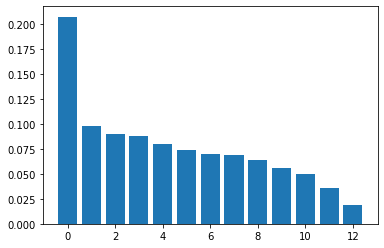

In [146]:
pca = PCA()
pca.fit(df)
exp_variance = pca.explained_variance_ratio_
pca.n_components_
plt.bar(range(len(exp_variance)), exp_variance)

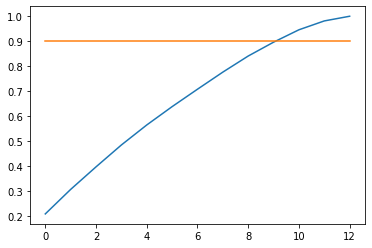

In [147]:
cum_exp_variance = np.cumsum(exp_variance)
plt.plot(range(len(cum_exp_variance)), cum_exp_variance)
plt.plot(range(len(cum_exp_variance)), [0.9] * len(cum_exp_variance))
plt.show()

In [148]:
n_components = 10
pca = PCA(n_components)
pca.fit(df)
pca_projection = pca.transform(df)
df = pd.DataFrame(pca_projection)
df

,0,1,2,3,4,5,6,7,8,9
0,-1.044787,-0.244288,1.376219,-0.294201,-0.663042,1.457154,-2.393102,2.566207,0.431557,-1.045898
1,-1.827196,-0.287581,-0.367834,-1.479599,-0.483302,1.483870,-0.594159,2.002847,-0.640872,-1.322325
2,-1.169418,0.124247,-1.108570,1.462174,0.956721,-1.032865,-0.625257,-0.813200,0.115167,-0.351107
3,-0.406747,-0.627389,-1.088876,0.196576,-2.315912,0.127896,0.056974,-0.980512,1.040886,0.027854
4,-1.040963,-1.004899,0.002576,-0.036552,-2.693655,-0.508772,1.119719,-0.720561,-0.281384,-0.632312
...,...,...,...,...,...,...,...,...,...,...
130658,-1.158307,0.586588,0.052139,1.447699,0.822500,-1.306467,-0.270560,-0.118412,-1.274247,-1.233883
130659,1.645664,-0.900378,0.101411,1.017346,2.004491,-0.641042,-0.156270,-0.108827,-1.680182,0.131304
130660,-1.368197,-0.822619,-1.093862,0.802203,0.407734,-0.348531,-1.401643,0.698656,-0.076539,0.504284
130661,-0.812130,0.028419,-0.325643,1.126145,1.166221,0.143559,-1.263235,-0.538658,1.075347,-0.481003


In [ ]:
clustering = MeanShift(n_jobs = 4)
clustering.fit(df)
predictions = clustering.predict(df)

In [130]:
clustering = KMeans(n_clusters = 3, n_jobs = 4)
clustering.fit(df)
predictions = clustering.predict(df)

In [ ]:
clustering.cluster_centers_


In [143]:
df

,0,1,2,3,4,5,6,7,8,9
0,-1.809800,-0.169107,-0.523938,-1.313059,-0.111023,1.495650,1.645096,1.157692,-0.972363,-1.374687
1,-0.369970,-0.584365,-1.327831,0.035172,-2.324099,0.268488,-0.431085,-0.521184,0.690885,-1.005474
2,-1.101379,-0.578093,0.942285,0.770116,-0.220248,0.100420,0.198210,-0.049015,0.910157,0.492153
3,2.235149,-0.176794,-1.224401,-0.520541,0.651683,-0.150766,-0.442447,0.360861,1.450327,-1.056090
4,-1.775087,0.427368,1.635928,-1.353644,-0.706824,0.952556,0.305979,-0.880004,-1.774352,-0.083824
...,...,...,...,...,...,...,...,...,...,...
6529,-1.711698,-0.472714,-0.937960,1.384697,0.545907,-0.962445,-1.076240,-0.554946,0.496763,-0.248044
6530,0.179631,-0.344184,-0.720653,1.113612,1.052625,-0.223940,-1.177815,-0.713610,0.467859,-0.595339
6531,-1.371796,0.234917,1.967564,0.578153,-1.025779,-1.021428,-0.313919,-0.008614,0.076848,-0.118053
6532,-1.295514,1.299329,-0.023196,1.000866,0.431234,-0.408075,0.838863,-1.021021,0.586686,0.969806


In [136]:
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)
df

,0,1,2,3,4,5,6,7,8,9
0,-1.809800,-0.169107,-0.523938,-1.313059,-0.111023,1.495650,1.645096,1.157692,-0.972363,-1.374687
1,-0.369970,-0.584365,-1.327831,0.035172,-2.324099,0.268488,-0.431085,-0.521184,0.690885,-1.005474
2,-1.101379,-0.578093,0.942285,0.770116,-0.220248,0.100420,0.198210,-0.049015,0.910157,0.492153
3,2.235149,-0.176794,-1.224401,-0.520541,0.651683,-0.150766,-0.442447,0.360861,1.450327,-1.056090
4,-1.775087,0.427368,1.635928,-1.353644,-0.706824,0.952556,0.305979,-0.880004,-1.774352,-0.083824
...,...,...,...,...,...,...,...,...,...,...
6529,-1.711698,-0.472714,-0.937960,1.384697,0.545907,-0.962445,-1.076240,-0.554946,0.496763,-0.248044
6530,0.179631,-0.344184,-0.720653,1.113612,1.052625,-0.223940,-1.177815,-0.713610,0.467859,-0.595339
6531,-1.371796,0.234917,1.967564,0.578153,-1.025779,-1.021428,-0.313919,-0.008614,0.076848,-0.118053
6532,-1.295514,1.299329,-0.023196,1.000866,0.431234,-0.408075,0.838863,-1.021021,0.586686,0.969806


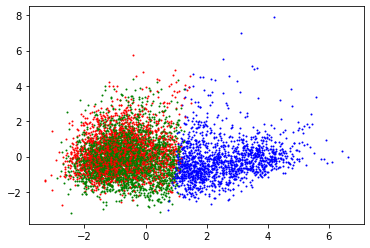

In [133]:

color_mapping = {
    0 : 'red',
    1 : 'blue',
    2 : 'green',
    3 : 'yellow'
}
for i in range(len(df)):
    plt.scatter(df[0][i], df[1][i], color = color_mapping[predictions[i]], s = 1)
    
plt.show()

In [118]:
predictions[0]

0